# Principal Component Analysis (PCA)
<div>It's an algoritm that reduces the dimension of data from n to k, trying to mantain it's characteristics as well as possible. The problem involves finding k vectors to project the data to.
    <br>
    <br>
Example: Reducing from 2 dimensions to 1 dimension involves finding a vector v that represents a line to project the points.
    <br>
    <br>
Note: It doesn't matter whether we find v or -v, since it represents the same line.</div>

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as sklearn_PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Data should be normalized before applying PCA. Feature Scaling is also important, but not needed with the iris dataset since all features are on the same scale.

In [2]:
def mean_normalize(data):
    X = data
    for feature_index in range(X.shape[1]):
        mean = np.mean(X[:,feature_index])
        
        for i, example in enumerate(X):
            X[i,feature_index] = example[feature_index] - mean
            
    return X

In [3]:
# Importing the dataset
iris = load_iris()
X = iris.data
X.shape

(150, 4)

In [4]:
# Normalizing
print("First example without normalization:\n", X[0])

X = mean_normalize(X)

print("\nFirst example normalized:\n", X[0])

First example without normalization:
 [5.1 3.5 1.4 0.2]

First example normalized:
 [-0.74333333  0.44266667 -2.358      -0.99933333]


#### Computing the Sigma Matrix
<img src='https://cdn-images-1.medium.com/max/1600/0*ZY2_q0ZY8s7MCftC.png' width='300'>

In [5]:
sigma = (X.T @ X)/X.shape[1]

sigma

array([[ 25.54208333,  -1.58066667,  47.46825   ,  19.23108333],
       [ -1.58066667,   7.07673333, -12.2797    ,  -4.53106667],
       [ 47.46825   , -12.2797    , 116.08135   ,  48.26145   ],
       [ 19.23108333,  -4.53106667,  48.26145   ,  21.64248333]])

#### Computing eigen values and eigen vectors

In [6]:
eigen_values, eigen_vectors = la.eig(sigma)

print("Eigen Vectors\n", eigen_vectors)
print("\nEigen Values\n", eigen_values)

Eigen Vectors
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

Eigen Values
 [157.50200355   9.03948536   2.91330388   0.88785721]


#### Selecting k (reduced number of dimensions)
<div> K should be selected as the smallest value that still retains a good percentage of variance (something around 90% is usually good enough). We can calculate the percentage of retained variance by summating the eigen values from 1 to k and dividing by the number of eigein values.</div>

<img src='https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w8_unsupervised_learning/unsupervisedlearning31.png' width='300'>

In [7]:
for k in range(1,5):
    print("k =", k, "-> Retained Variance =", np.sum(eigen_values[:k])/sum(eigen_values))

k = 1 -> Retained Variance = 0.9246187232017272
k = 2 -> Retained Variance = 0.9776852063187947
k = 3 -> Retained Variance = 0.9947878161267245
k = 4 -> Retained Variance = 1.0


#### Selecting the first k eigen vectors

In [8]:
U = eigen_vectors[:,:2] # k == 2
U

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

#### Applying PCA

In [9]:
z0 = X @ U
print('Old 4-dimensional first example (normalized):\n', X[0])
print('\nNew 2-dimesional first example:\n', z0[0])

Old 4-dimensional first example (normalized):
 [-0.74333333  0.44266667 -2.358      -0.99933333]

New 2-dimesional first example:
 [-2.68412563 -0.31939725]


#### Applying Sklearn's PCA

In [10]:
# Importing dataset
iris = load_iris()
X = iris.data
X.shape

(150, 4)

In [11]:
pca = sklearn_PCA(n_components=2) # k == 2
pca.fit(X)
z1 = pca.transform(X)

print('Old 4-dimensional first example:\n', X[0])
print('\nNew 2-dimesional first example:\n', z1[0])

Old 4-dimensional first example:
 [5.1 3.5 1.4 0.2]

New 2-dimesional first example:
 [-2.68412563  0.31939725]


#### Plotting the new dataset with only 2 features
<br>
<div>Sklearn's PCA returned the same values as my PCA, but my vectors are [v1, v2] while sklearn's are [v1, -v2]. So when I plot the data, it seems upside down. As explained before, it doesn't matter whether it's v or -v. The result will be the same.</div>

In [12]:
print("My vectors:\n",U.T)
print("\nSklearn's vectors\n", pca.components_)

My vectors:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]

Sklearn's vectors
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Text(0.5, 1.0, "Sklearn's PCA with -y")

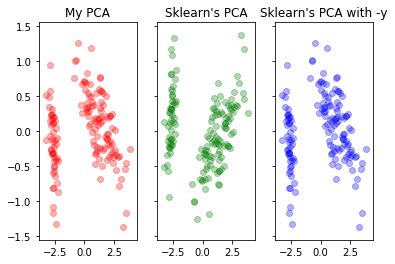

In [13]:
# Plotting
figures, axes = plt.subplots(1,3, sharex=True, sharey=True)
axes[0].scatter(z0[:,0],z0[:,1], c='r', alpha=0.3)
axes[0].set_title('My PCA')

axes[1].scatter(z1[:,0],z1[:,1], c='g', alpha=0.3)
axes[1].set_title("Sklearn's PCA")

axes[2].scatter(z1[:,0],-z1[:,1], c='b', alpha=0.3)
axes[2].set_title("Sklearn's PCA with -y")

### Putting things together

In [14]:
def my_PCA(X, epsilon=None, k=None):
    """ Runs PCA either by a fixed k or 
        by automaticly finding a k that mantains variance above epsilon %"""
    
    # Normalizing X
    X = mean_normalize(X)
    
    # Computing the sigma matrix
    sigma = (X.T @ X)/X.shape[1]
    
    # Computing eigen values and eigen vectors
    eigen_values, eigen_vectors = la.eig(sigma)
    
    # Select the smallest k with retained variance above epsilon
    if (k == None):
        k = 1
        retained_variance = eigen_values[:k]/sum(eigen_values)
        
        while(retained_variance < epsilon):
            retained_variance = np.sum(eigen_values[:k+1])/sum(eigen_values)
            k += 1
    
    # if k was passed as an argument
    else: 
        retained_variance = sum(eigen_values[:k])/sum(eigen_values)
        
    # Select the first k vectors
    U = eigen_vectors[:,:k]
    
    z = X @ U
    
    return (z, retained_variance)       

In [15]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

### Comparing Logistic Regression models with the original data with n dimensions vs the new data with k dimensions

#### n dimensions

In [16]:
# Splitting the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("First example:\n", X_train[0])

# Applying Logistic Regression
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
clf.fit(X_train,y_train)
print("\nOriginal data's score:", clf.score(X_test, y_test))

First example:
 [6.1 3.  4.6 1.4]

Original data's score: 0.9666666666666667


#### k dimensions

Retained Variance [0.92461872]


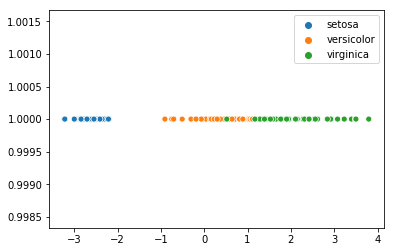

In [17]:
# Applying PCA
z2, retained_variance = my_PCA(X, epsilon=0.9)
print("Retained Variance", retained_variance)

# Concatenating target feature to z2
iris = sns.load_dataset('iris')
x = np.concatenate((z2,np.atleast_2d(iris.loc[:,'species']).T),axis=1)

# Plotting
ax = sns.scatterplot(x=x[:,0], y=np.ones(len(x)), hue=x[:,1])

In [18]:
# Splitting the lower dimensional data
X_train, X_test, y_train, y_test = train_test_split(z2, y, test_size=0.2, random_state=1)
print("First example:\n", X_train[0])

# Applying Logistic Regression
clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
clf.fit(X_train,y_train)
print("\nNew k-dimesional data's score:", clf.score(X_test, y_test))

First example:
 [0.8908152]

New k-dimesional data's score: 0.9666666666666667


## Both have the same score!